In [5]:
import os
import urllib
import numpy as np
from PIL import Image
from cv2 import resize
import matplotlib.pyplot as plt

In [20]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7265308292629763765
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 8328164875111693127
physical_device_desc: "device: XLA_CPU device"
]


In [21]:
from vgg16_places_365 import VGG16_Places365

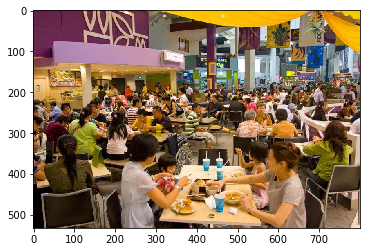

In [22]:
TEST_IMAGE_URL = 'http://places2.csail.mit.edu/imgs/demo/6.jpg'

image = Image.open(urllib.request.urlopen(TEST_IMAGE_URL))
plt.imshow(image)
image = np.array(image, dtype=np.uint8)
image = resize(image, (224, 224))

image = np.expand_dims(image, 0)


In [24]:
model = VGG16_Places365(weights='places')
# model.cuda()
predictions_to_return = 10
preds = model.predict(image)[0] # confidence score for each category
top_preds = np.argsort(preds)[::-1][0:predictions_to_return]

In [25]:
top10 = [preds[a] for a in top_preds]
print(top10)

[0.25987545, 0.22528961, 0.14122191, 0.0878406, 0.06867418, 0.06441522, 0.019663034, 0.016306462, 0.0141025465, 0.011243654]


In [26]:
# load the class label
file_name = 'categories_places365.txt'
if not os.access(file_name, os.W_OK):
    synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/categories_places365.txt'
    os.system('wget ' + synset_url)
classes = list()
with open(file_name) as class_file:
    for line in class_file:
        classes.append(line.strip().split(' ')[0][3:])
classes = tuple(classes)

len(classes)

365

In [27]:
print('--SCENE CATEGORIES:')
# output the prediction
for i in range(0, 10):
    print(classes[top_preds[i]])

--SCENE CATEGORIES:
cafeteria
food_court
restaurant_patio
banquet_hall
restaurant
dining_hall
bazaar/outdoor
diner/outdoor
flea_market/indoor
inn/outdoor


# Extract features from images with VGG16-hybrid1365

In [7]:
import numpy as np
from PIL import Image
from cv2 import resize

from vgg16_hybrid_places_1365 import VGG16_Hybrid_1365

TEST_IMAGE_URL = 'http://places2.csail.mit.edu/imgs/demo/6.jpg'

image = Image.open(urllib.request.urlopen(TEST_IMAGE_URL))
image = np.array(image, dtype=np.uint8)
image = resize(image, (224, 224))
image = np.expand_dims(image, 0)

model = VGG16_Hybrid_1365(weights='places', include_top=False)
features = model.predict(image)
np.shape(features)

(1, 7, 7, 512)

# Validation

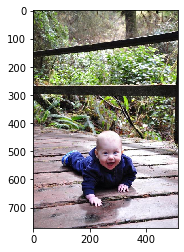

In [3]:
image = Image.open('../plcaces365_data/val_large/Places365_val_00000001.jpg')
plt.imshow(image)
image = np.array(image, dtype=np.uint8)
image = resize(image, (224, 224))

image = np.expand_dims(image, 0)



In [4]:
# read the ground truth
with open ('../plcaces365_data/annotations/places365_val.txt','r') as f:
    gts = f.readlines()
gts_x = [i.split()[0] for i in gts]
gts_y = [i.split()[1] for i in gts]

In [ ]:
val_path = '../plcaces365_data/val_large/'
val_data = os.listdir(val_path)
count = 0
for data in val_data:
    image = Image.open(os.path.join(val_path,data))
#     plt.imshow(image)
    image = np.array(image, dtype=np.uint8)
    image = resize(image, (224, 224))
    image = np.expand_dims(image, 0)
    model = VGG16_Places365(weights='places')
    predictions_to_return = 10
    preds = model.predict(image)[0] # confidence score for each category
    top_preds = np.argsort(preds)[::-1][0:predictions_to_return]
    if count%10 ==0:
        print(count)
    count+=1
    


    

0
10
20
